In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
df = pd.read_csv('/Users/tevfikerkut/Downloads/Sample - Superstore_Orders.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country/Region          9994 non-null   object 
 3   Customer ID             9994 non-null   object 
 4   Customer Name           9994 non-null   object 
 5   Order Date              9994 non-null   object 
 6   Order ID                9994 non-null   object 
 7   Postal Code             9983 non-null   float64
 8   Product ID              9994 non-null   object 
 9   Product Name            9994 non-null   object 
 10  Region                  9994 non-null   object 
 11  Row ID                  9994 non-null   int64  
 12  Segment                 9994 non-null   object 
 13  Ship Date               9994 non-null   object 
 14  Ship Mode               9994 non-null   

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Sales'] = df['Sales'].str.replace('$','').str.replace(',','').astype(float)
df['Profit'] = df['Profit'].str.replace('$','').str.replace(',','').astype(float)
df['order_year'] = df['Order Date'].dt.strftime('%Y')
df['order_month'] = df['Order Date'].dt.strftime('%B')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country/Region          9994 non-null   object        
 3   Customer ID             9994 non-null   object        
 4   Customer Name           9994 non-null   object        
 5   Order Date              9994 non-null   datetime64[ns]
 6   Order ID                9994 non-null   object        
 7   Postal Code             9983 non-null   float64       
 8   Product ID              9994 non-null   object        
 9   Product Name            9994 non-null   object        
 10  Region                  9994 non-null   object        
 11  Row ID                  9994 non-null   int64         
 12  Segment                 9994 non-null   object  

/var/folders/60/xprj_sxn6lg39mk0twh0xdcr0000gn/T/ipykernel_3170/602723211.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales'] = df['Sales'].str.replace('$','').str.replace(',','').astype(float)
/var/folders/60/xprj_sxn6lg39mk0twh0xdcr0000gn/T/ipykernel_3170/602723211.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Profit'] = df['Profit'].str.replace('$','').str.replace(',','').astype(float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country/Region          9994 non-null   object        
 3   Customer ID             9994 non-null   object        
 4   Customer Name           9994 non-null   object        
 5   Order Date              9994 non-null   datetime64[ns]
 6   Order ID                9994 non-null   object        
 7   Postal Code             9983 non-null   float64       
 8   Product ID              9994 non-null   object        
 9   Product Name            9994 non-null   object        
 10  Region                  9994 non-null   object        
 11  Row ID                  9994 non-null   int64         
 12  Segment                 9994 non-null   object  

In [5]:
df_last_12_m = df.sort_values(by="Ship Date",ascending=True).set_index("Order Date").last("12M")
df_last_24_m = df.sort_values(by="Ship Date",ascending=True).set_index("Order Date").last("24M")

In [6]:
df_last_12_agg_sum = df_last_12_m.groupby('Sub-Category').agg('sum').sort_values(by='Profit', ascending=False)
df_last_12_agg_sum

,Postal Code,Row ID,Days to Ship Actual,Days to Ship Scheduled,Profit,Quantity,Sales
Sub-Category,,,,,,,
Copiers,1397973.0,123849,71,86,25032.0,73,62900.0
Accessories,15666674.0,1439919,1072,1173,15668.0,1078,59939.0
Phones,15658068.0,1465307,1141,1235,12847.0,1090,105356.0
Paper,25090789.0,2356710,1783,1910,12034.0,1702,27701.0
Appliances,9215226.0,858079,645,690,7919.0,650,42906.0
Binders,28750492.0,2474899,2042,2181,7723.0,2035,72728.0
Chairs,10196721.0,1001560,743,801,7671.0,670,95244.0
Storage,16549872.0,1429676,1108,1183,7487.0,1014,68854.0
Furnishings,16834313.0,1570038,1198,1283,4082.0,1077,28252.0


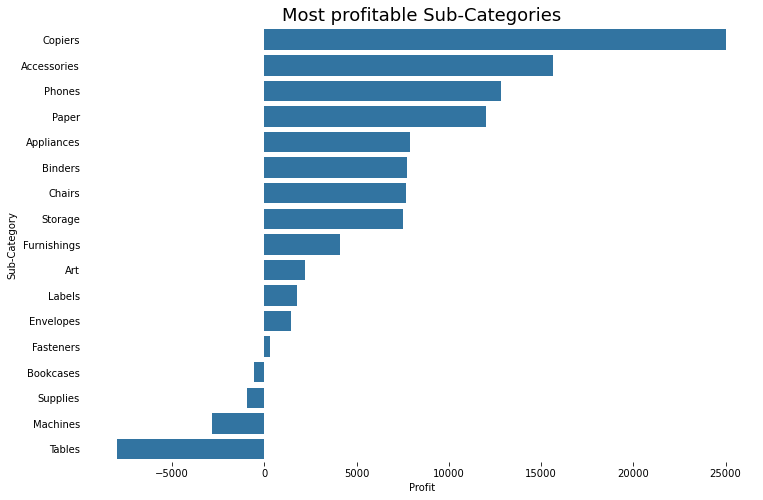

In [7]:
plt.figure(figsize=(12,8))
plt.title('Most profitable Sub-Categories', fontdict={'fontsize': 18})
sns.barplot(data=df_last_12_agg_sum, x='Profit', y=df_last_12_agg_sum.index, color=sns.color_palette("tab10")[0]);
sns.despine(bottom=True, left=True)
plt.tick_params(left=False)

In [8]:
df_last_24_m.groupby(['State', 'Order Date']).agg('sum')['Sales'].sort_values(ascending=True) #.plot(kind='barh');

State           Order Date
Illinois        2020-06-21        1.0
Colorado        2021-12-28        1.0
Texas           2021-12-11        1.0
Oregon          2021-07-09        1.0
Texas           2021-04-26        2.0
                               ...   
North Carolina  2021-11-04    10051.0
Delaware        2021-11-17    10500.0
New York        2021-10-22    13717.0
Washington      2021-03-23    14087.0
Indiana         2020-10-02    18336.0
Name: Sales, Length: 2460, dtype: float64

In [9]:
# plot product names with pointplit the edges are the years and the y axis is the sales
# sns.pointplot(data=df_last_12_m, x='order_year', y='Sales', col='Product Name')

In [10]:
df_last_24_m.reset_index()[['Order Date', 'State', 'Sales', 'order_year', 'order_month']]#.pivot_table(columns=['order_year', 'order_month'], values='Sales', index='State', aggfunc='sum')

,Order Date,State,Sales,order_year,order_month
0,2020-01-05,Florida,191.0,2020,January
1,2020-01-02,Maryland,232.0,2020,January
2,2020-01-05,Florida,5.0,2020,January
3,2020-01-02,Maryland,174.0,2020,January
4,2020-01-05,Florida,59.0,2020,January
...,...,...,...,...,...
5893,2021-12-28,New York,33.0,2021,December
5894,2021-12-28,New York,14.0,2021,December
5895,2021-12-29,Michigan,210.0,2021,December
5896,2021-12-30,Indiana,209.0,2021,December


In [11]:
df_grouped = df_last_24_m.reset_index().groupby(['State', 'order_year', 'order_month'], as_index=False)['Sales'].agg('sum')
df_grouped

,State,order_year,order_month,Sales
0,Alabama,2020,August,197.0
1,Alabama,2020,July,29.0
2,Alabama,2020,June,225.0
3,Alabama,2020,May,1008.0
4,Alabama,2020,November,4630.0
...,...,...,...,...
667,Wisconsin,2021,March,2012.0
668,Wisconsin,2021,November,353.0
669,Wisconsin,2021,October,61.0
670,Wisconsin,2021,September,474.0


In [12]:
df_2020 = df_grouped.query('order_year == "2020"').set_index(['order_month', 'State'])
df_2021 = df_grouped.query('order_year == "2021"').set_index(['order_month', 'State'])

In [13]:
df_diff = pd.DataFrame(df_2021.Sales - df_2020.Sales).reset_index()
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_month  414 non-null    object 
 1   State        414 non-null    object 
 2   Sales        258 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.8+ KB


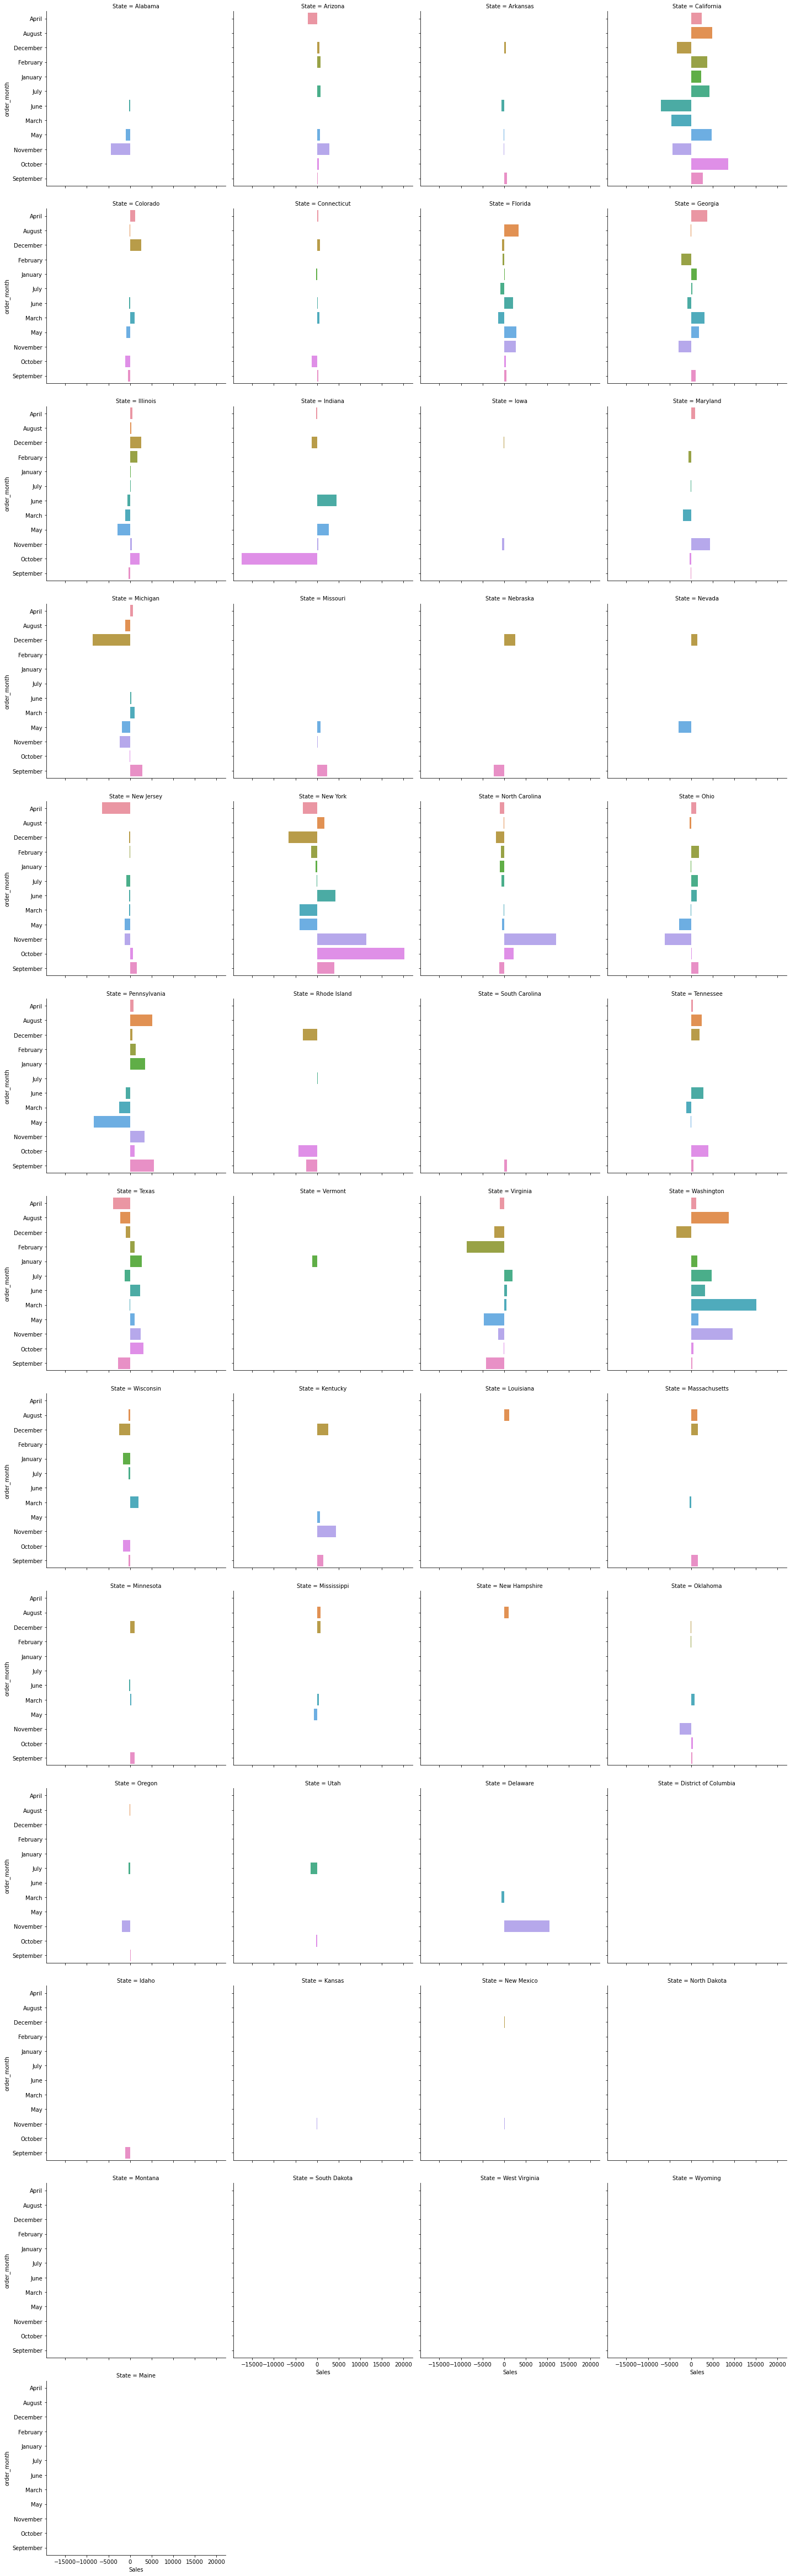

In [14]:
sns.catplot(data=df_diff, x='Sales', y='order_month', col='State', col_wrap=4, kind='bar');

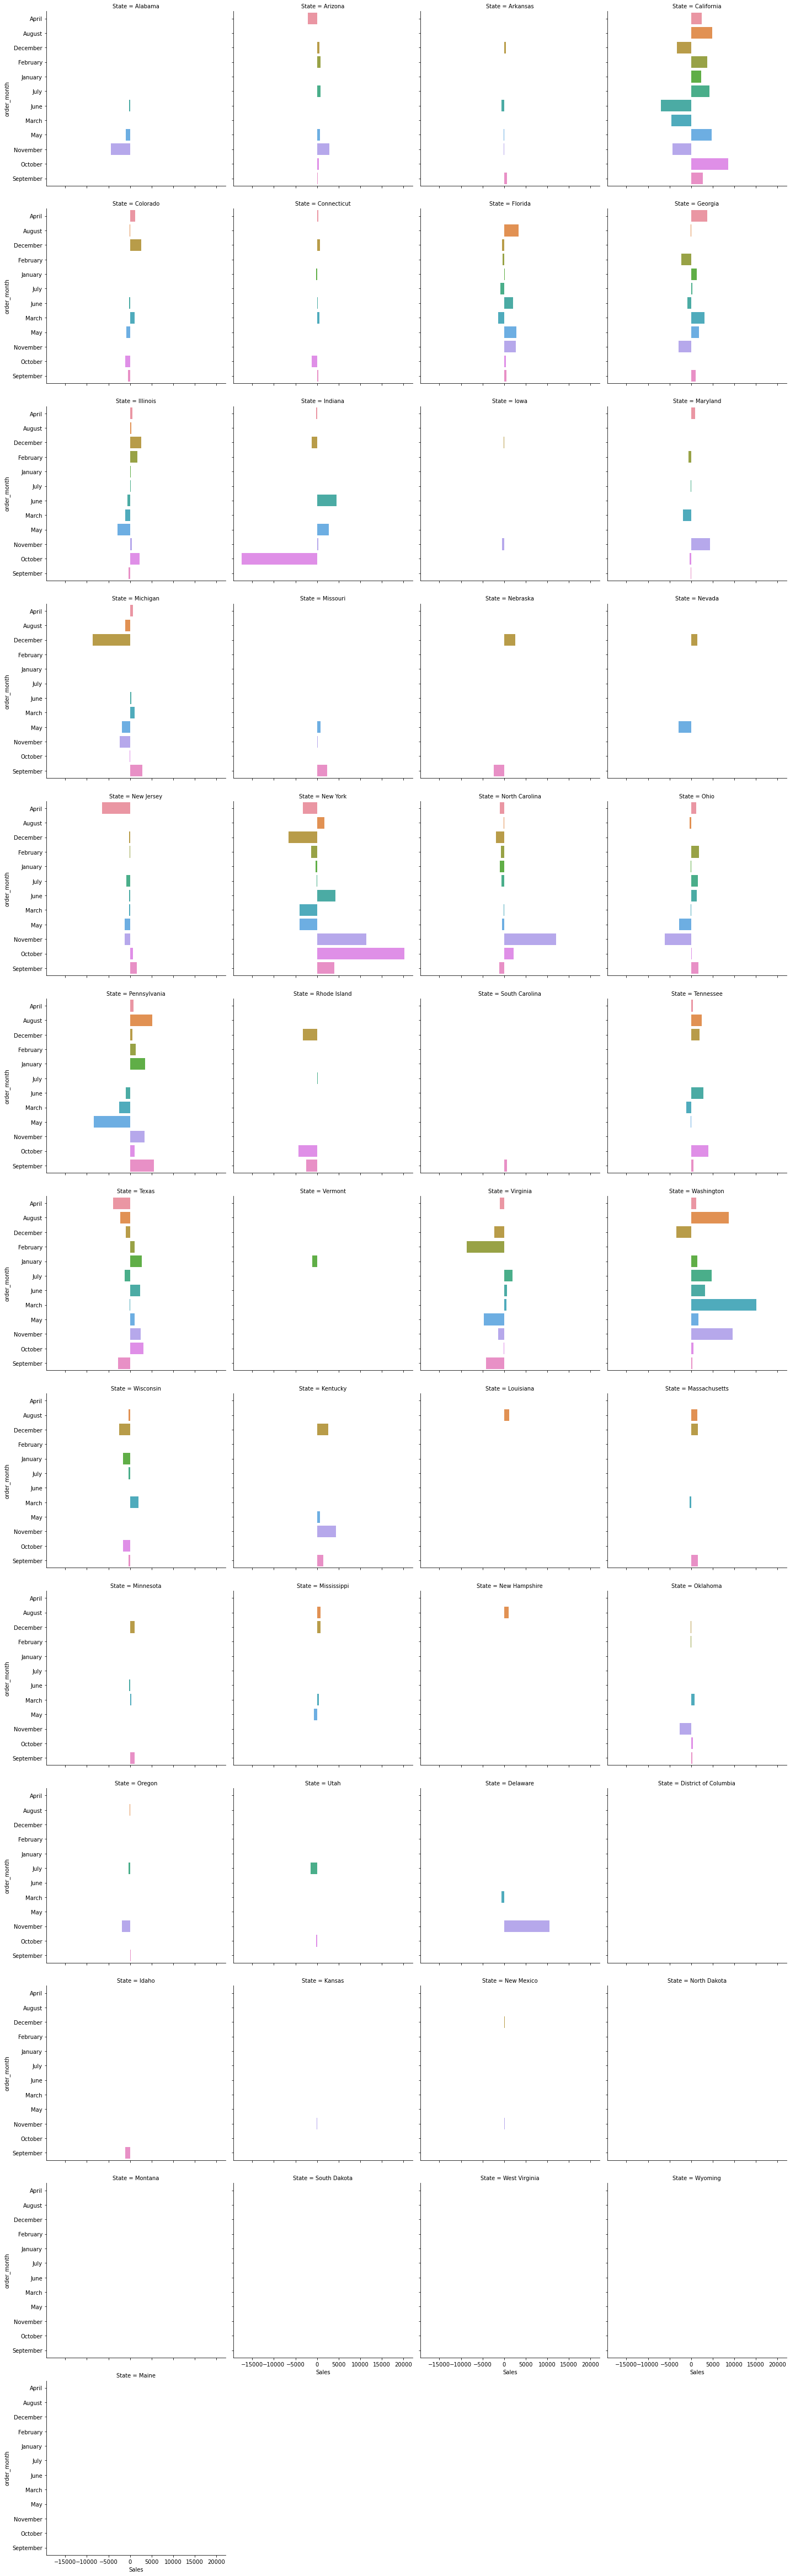

In [15]:
sns.catplot(data=df_diff, x='Sales', y='order_month', col='State', col_wrap=4, kind='bar');

In [16]:
df_diff['order_month'] = pd.Categorical(df_diff['order_month'], categories=df_last_12_m.order_month.unique(), ordered=True)
df_diff

,order_month,State,Sales
0,April,Alabama,NaN
1,April,Arizona,-2178.0
2,April,Arkansas,NaN
3,April,California,2486.0
4,April,Colorado,1271.0
...,...,...,...
409,September,Texas,-2713.0
410,September,Utah,NaN
411,September,Virginia,-4202.0
412,September,Washington,348.0


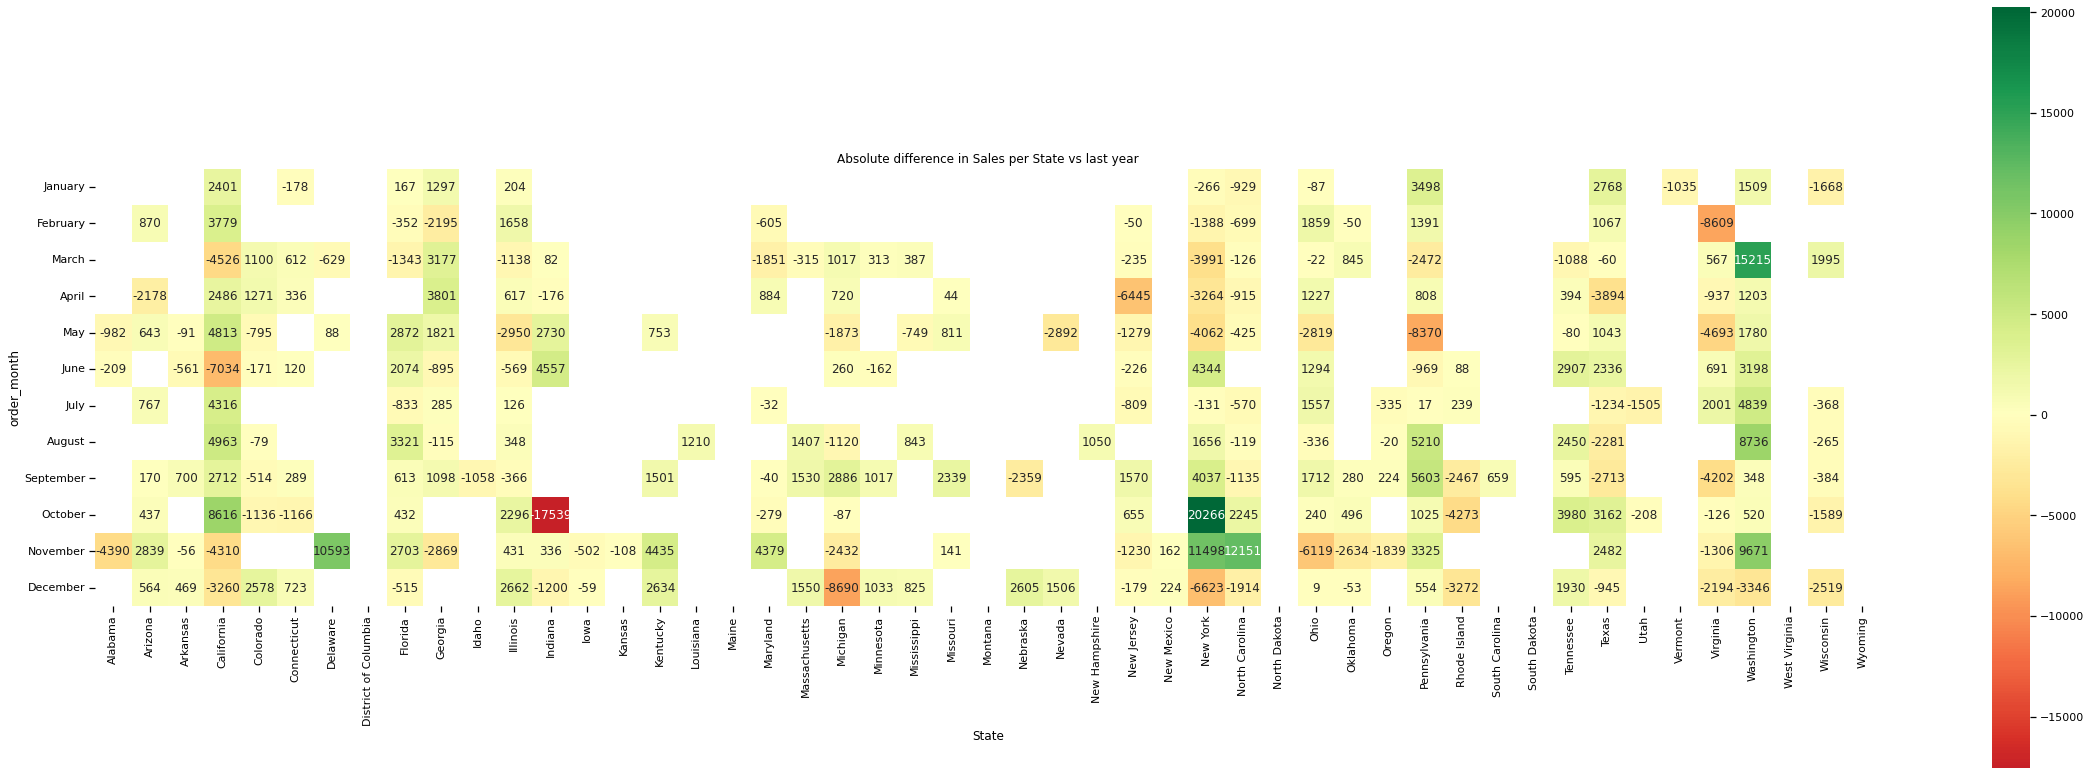

In [17]:
sns.set_context("notebook")

plt.figure(figsize=(40,14))
plt.title('Absolute difference in Sales per State vs last year')
sns.heatmap(data=df_diff.pivot("order_month", "State", "Sales"), square=True, annot=True, cmap="RdYlGn", fmt='g', center=0);

# Churn Rate

The churn rate formula is: (Lost Customers ÷ Total Customers at the Start of Time Period) x 100

In [ ]:
def churn_calculator(df,customer_count, year,first_month, second_month):
    df
    

In [37]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["month"] = df["Order Date"].dt.month

In [39]:
sub_df =df.groupby(["order_year", "month"], as_index = False)["Order Date"].count()
sub_df.columns = ["year", "month", "customer_count"]

In [41]:
sub_df["difference"]sub_df.customer_count.diff()

0       NaN
1     -33.0
2     111.0
3     -22.0
4     -13.0
5      13.0
6       8.0
7      10.0
8     115.0
9    -109.0
10    159.0
11    -40.0
12   -220.0
13      6.0
14     74.0
15     22.0
16    -14.0
17     -8.0
18      2.0
19     19.0
20    134.0
21   -127.0
22    158.0
23     -8.0
24   -227.0
25     -6.0
26     80.0
27      7.0
28     55.0
29    -26.0
30      2.0
31    -25.0
32    187.0
33   -167.0
34    174.0
35    -18.0
36   -197.0
37    -48.0
38    131.0
39    -35.0
40     39.0
41      3.0
42    -19.0
43     -8.0
44    241.0
45   -161.0
46    161.0
47      3.0
Name: customer_count, dtype: float64

In [19]:
# remove duplicates

df = df[~df.duplicated()]

# remove records with customer ID NULL

df = df[df['Customer ID'].notnull()].copy()

# Function that converts date to year month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# Create the invoicemonth period column

df['OrderMonth'] = df['Order Date'].apply(get_month)
df.head()

# Group by customerID and select only the invoicemonth column
grouping = df.groupby('Customer ID')['OrderMonth']

# Take the earliest date of each customer and assign it back to the orignal dataset
df['CohortMonth'] = grouping.transform('min')
df

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast,order_year,order_month,OrderMonth,CohortMonth
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,3,0.00%,42.0,2,262.0,$392,2020,November,2020-11-01,2019-10-01
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,3,0.00%,220.0,3,732.0,"$1,096",2020,November,2020-11-01,2019-10-01
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,3,0.00%,7.0,2,15.0,$22,2020,June,2020-06-01,2020-06-01
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,6,45.00%,-383.0,5,958.0,"$1,434",2019,October,2019-10-01,2019-10-01
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,6,20.00%,3.0,2,22.0,$33,2019,October,2019-10-01,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Furniture,Miami,United States,TB-21400,Tom Boeckenhauer,2018-01-21,CA-2018-110422,33180.0,FUR-FU-10001889,Ultra Door Pull Handle,...,3,20.00%,4.0,3,25.0,$38,2018,January,2018-01-01,2018-01-01
9990,Furniture,Costa Mesa,United States,DB-13060,Dave Brooks,2021-02-26,CA-2021-121258,92627.0,FUR-FU-10000747,Tenex B1-RE Series Chair Mats for Low Pile Car...,...,6,0.00%,16.0,2,92.0,$138,2021,February,2021-02-01,2018-03-01
9991,Technology,Costa Mesa,United States,DB-13060,Dave Brooks,2021-02-26,CA-2021-121258,92627.0,TEC-PH-10003645,Aastra 57i VoIP phone,...,6,20.00%,19.0,2,259.0,$387,2021,February,2021-02-01,2018-03-01
9992,Office Supplies,Costa Mesa,United States,DB-13060,Dave Brooks,2021-02-26,CA-2021-121258,92627.0,OFF-PA-10004041,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",...,6,0.00%,13.0,4,30.0,$44,2021,February,2021-02-01,2018-03-01


In [20]:
def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
  
# Get the integers for the date parts from the 'OrderMonth' column
invoice_year, invoice_month = get_date_int(df, 'OrderMonth')

# Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values

df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Discount,Profit,Quantity,Sales,Sales Forecast,order_year,order_month,OrderMonth,CohortMonth,CohortIndex
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,0.00%,42.0,2,262.0,$392,2020,November,2020-11-01,2019-10-01,14
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,0.00%,220.0,3,732.0,"$1,096",2020,November,2020-11-01,2019-10-01,14
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,0.00%,7.0,2,15.0,$22,2020,June,2020-06-01,2020-06-01,1
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,45.00%,-383.0,5,958.0,"$1,434",2019,October,2019-10-01,2019-10-01,1
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,20.00%,3.0,2,22.0,$33,2019,October,2019-10-01,2019-10-01,1


In [21]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per Customer ID
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

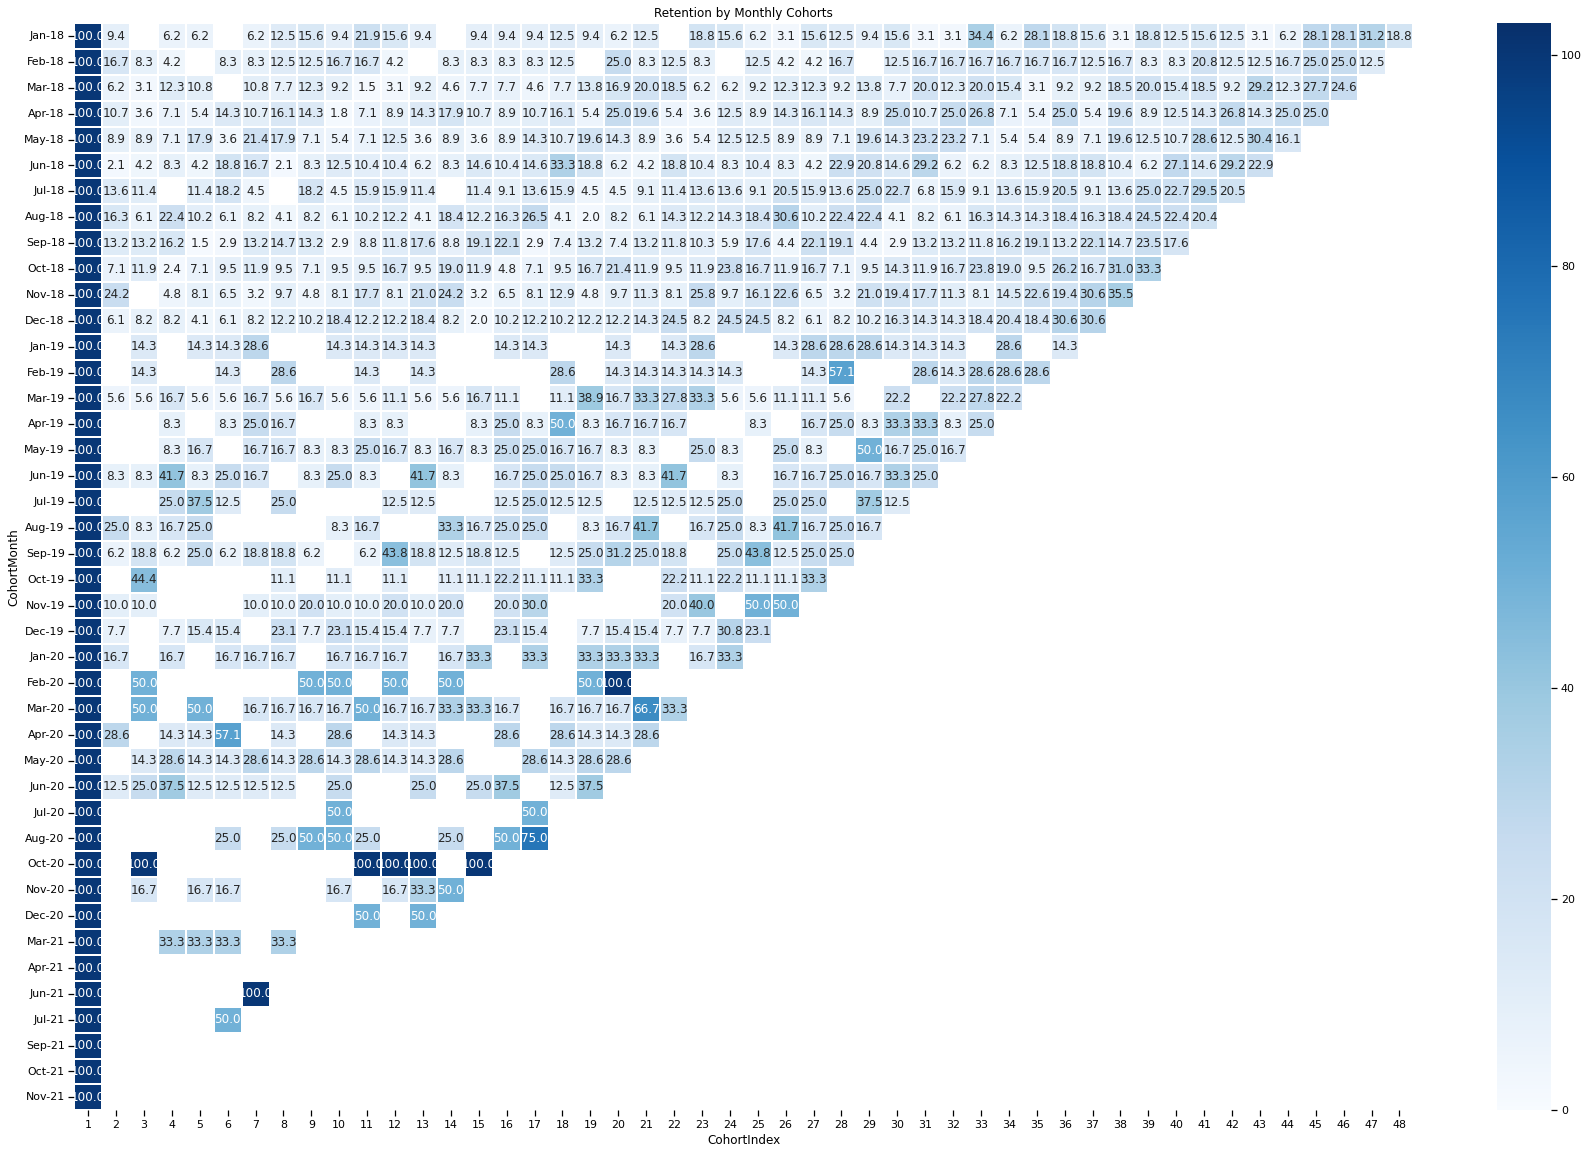

In [22]:
# Create list of month names for visualisation
month_list = retention.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

# Initialize inches plot figure
plt.figure(figsize=(30,20))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list);

In [23]:
grouping = df.groupby('Customer ID')['OrderMonth']

In [24]:
def churn_rate_calc(df, customer_id='Customer ID', state='State'):
    df

In [ ]:
df.groupby('Customer ID')[].agg(np.size)

,Category,City,Country/Region,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,Region,...,Discount,Profit,Quantity,Sales,Sales Forecast,order_year,order_month,OrderMonth,CohortMonth,CohortIndex
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,11,11,11,11,11,11,11.0,11,11,11,...,11,11.0,11,11.0,11,11,11,11,11,11
AA-10375,15,15,15,15,15,15,15.0,15,15,15,...,15,15.0,15,15.0,15,15,15,15,15,15
AA-10480,12,12,12,12,12,12,12.0,12,12,12,...,12,12.0,12,12.0,12,12,12,12,12,12
AA-10645,18,18,18,18,18,18,18.0,18,18,18,...,18,18.0,18,18.0,18,18,18,18,18,18
AB-10015,6,6,6,6,6,6,6.0,6,6,6,...,6,6.0,6,6.0,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,28,28,28,28,28,28,28.0,28,28,28,...,28,28.0,28,28.0,28,28,28,28,28,28
YC-21895,8,8,8,8,8,8,8.0,8,8,8,...,8,8.0,8,8.0,8,8,8,8,8,8
YS-21880,12,12,12,12,12,12,12.0,12,12,12,...,12,12.0,12,12.0,12,12,12,12,12,12


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a498cdd2-d09b-4173-8808-e134c71e8d66' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>